In [36]:
from PIL import Image
import pandas as pd
import os, os.path,time
import csv
import matplotlib.pyplot as plt
import numpy as np

In [37]:
Dimension = 64

In [38]:
fileList = []
def createFileList(myDir, format='.jpg'):
    
    print(myDir)
    for root, dirs, files in os.walk(myDir, topdown=False):
        for name in files:
            if name.endswith(format):
                fullName = os.path.join(root, name)
                fileList.append(fullName)
    return fileList

#load the original image from the folder "testofimagetocsv"


In [39]:
myFileList = createFileList('D:/age-and-gender-detection/testing')
print(myFileList)

D:/age-and-gender-detection/testing
['D:/age-and-gender-detection/testing\\25_1_first.jpg', 'D:/age-and-gender-detection/testing\\26_1_first.jpg', 'D:/age-and-gender-detection/testing\\30_1_first.jpg']


In [40]:
def split_file_name(filename):
    split_data = filename.split('_')
    # split_data2 = split_data[2].split('.')
    #same name hos matlab xina
    return (split_data)

In [41]:
new_dict = {
    'age':[],
    'gender':[],
    'image_name':[],
    'pixels':[]
    }

df = pd.DataFrame(new_dict)
for en,file in enumerate(myFileList):
    img_file = Image.open(file)
    img_file = img_file.resize((Dimension,Dimension))
    width, height = img_file.size
     
    print(en)
    # print('width,height',width,height) 
    #ans is 200 200

    # file_name = img_file.filename
    # print('file name :',file_name)
    
    head, tail = os.path.split(file)
    print(tail)
    split_data = split_file_name(tail) 
    print(split_data)

    format=img_file.format
    mode=img_file.mode

    #converting into gray scale
    #here L is single channel mode which is generally for converting into greyscale
    img_grey = img_file.convert('L')
    
    #converting into numpyarray
    #value=np.asarray(img_grey)
    value=np.asarray(img_grey.getdata(),dtype=np.int).reshape((img_grey.size[1],img_grey.size[0]))
    # print('value:',type(value),value)    
    
    #pandas feature 2d to 1d 
    value=value.flatten()
    # print(type(value))
    # print(value.shape)
    tostr = lambda x: [str(y) for y in x]
    
    name_array = ' '.join(tostr(value))
    # print(name_array)
    # ,age,gender,image_name,pixel
    # print(new_data)
    df.loc[en] = [str(split_data[0]),str(split_data[1]),str(split_data[2]),name_array]
df.to_csv('../dataset/dataset1.csv',index=False)    

0
25_1_first.jpg
['25', '1', 'first.jpg']
1
26_1_first.jpg
['26', '1', 'first.jpg']
2
30_1_first.jpg
['30', '1', 'first.jpg']


In [42]:
df = pd.read_csv('dataset.csv')
df.head()

,age,gender,image_name,pixels
0,25,1,first.jpg,127 143 150 142 129 137 142 106 43 20 20 15 7 ...
1,26,1,first.jpg,63 68 73 78 82 82 80 88 98 105 120 132 140 146...
2,30,1,first.jpg,95 113 130 133 128 128 101 81 71 56 48 51 50 4...


# Checking GreyScale or not

In [43]:
# data=pd.read_csv("../dataset/age_gender.csv")
data=pd.read_csv("../convert_to_dataset/dataset.csv")
data.head()

,age,gender,image_name,pixels
0,25,1,first.jpg,127 143 150 142 129 137 142 106 43 20 20 15 7 ...
1,26,1,first.jpg,63 68 73 78 82 82 80 88 98 105 120 132 140 146...
2,30,1,first.jpg,95 113 130 133 128 128 101 81 71 56 48 51 50 4...


In [44]:
#convert pixels into numpy array
data['pixels']=data['pixels'].apply(lambda x: np.array(x.split(), dtype="float32"))
data.head()

,age,gender,image_name,pixels
0,25,1,first.jpg,"[127.0, 143.0, 150.0, 142.0, 129.0, 137.0, 142..."
1,26,1,first.jpg,"[63.0, 68.0, 73.0, 78.0, 82.0, 82.0, 80.0, 88...."
2,30,1,first.jpg,"[95.0, 113.0, 130.0, 133.0, 128.0, 128.0, 101...."


In [45]:
X = np.array(data['pixels'].tolist())
print(X)

[[127. 143. 150. ... 120. 105. 104.]
 [ 63.  68.  73. ...  58.  64.  64.]
 [ 95. 113. 130. ...  55.  87.  96.]]


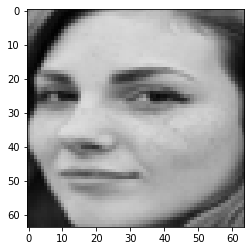

In [46]:
data = np.reshape(X[0], (Dimension, Dimension))
data = Image.fromarray(data)
imgg = plt.imshow(data)
plt.show(imgg)
# # saving the final output 
# # as a PNG file
# data.save('greyOrnot.png')